In [21]:
import pandas as pd
from helper import get_my_dataset
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
"""
Get the data_set filtered for my borough
"""
main_df = get_my_dataset()

In [4]:
"""
Checking the rows and columns of the dataset
"""
main_df.shape

(2070, 32)

In [10]:
main_df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [18]:
"""
Function to change data types according to manually updated data-types.csv.
"""
def process_dataframe(df, csv_path):
    # Read the CSV file
    instructions = pd.read_csv(csv_path)
    
    # Iterate over the instructions
    for index, row in instructions.iterrows():
        col_name = row.iloc[0]
        new_type = row.iloc[1]
        action = row.iloc[2]
        
        # Drop the column if action is "Drop"
        if action == "Drop":
            df = df.drop(columns=[col_name])
        else:
            # Change the data type of the column
            if new_type == "numerical":
                df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            elif new_type == "categorical":
                df[col_name] = df[col_name].astype(str)
    
    return df

processed_df = process_dataframe(main_df, 'data_types.csv')
processed_df.dtypes

Accident_Index                object
Longitude                    float64
Latitude                     float64
Accident_Severity             object
Number_of_Casualties           int64
Road_Type                     object
Speed_limit                   object
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
LSOA_of_Accident_Location     object
dtype: object

In [19]:
""" 
Checking missing values
"""
# Define all conditions for missing or invalid values
conditions = [
    processed_df.isnull(),                # NaN or None
    processed_df.isna(),                  # Alias for isnull()
    (processed_df == 'Nan'),              # String 'Nan'
    (processed_df == 'nan'),              # String 'nan'
    (processed_df == pd.NA),              # Pandas NA
    (processed_df == '-1'),               # String '-1'
    (processed_df == ''),                 # Empty string
    (processed_df == 'NULL'),             # String 'NULL'
    (processed_df == None)                # Python None
]

# Combine all conditions using logical OR
combined_mask = conditions[0]
for condition in conditions[1:]:
    combined_mask |= condition

# Count missing values per column
missing_values = combined_mask.sum()

# Print the results
print(missing_values)


Accident_Index               0
Longitude                    0
Latitude                     0
Accident_Severity            0
Number_of_Casualties         0
Road_Type                    0
Speed_limit                  0
Light_Conditions             0
Weather_Conditions           0
Road_Surface_Conditions      0
LSOA_of_Accident_Location    4
dtype: int64


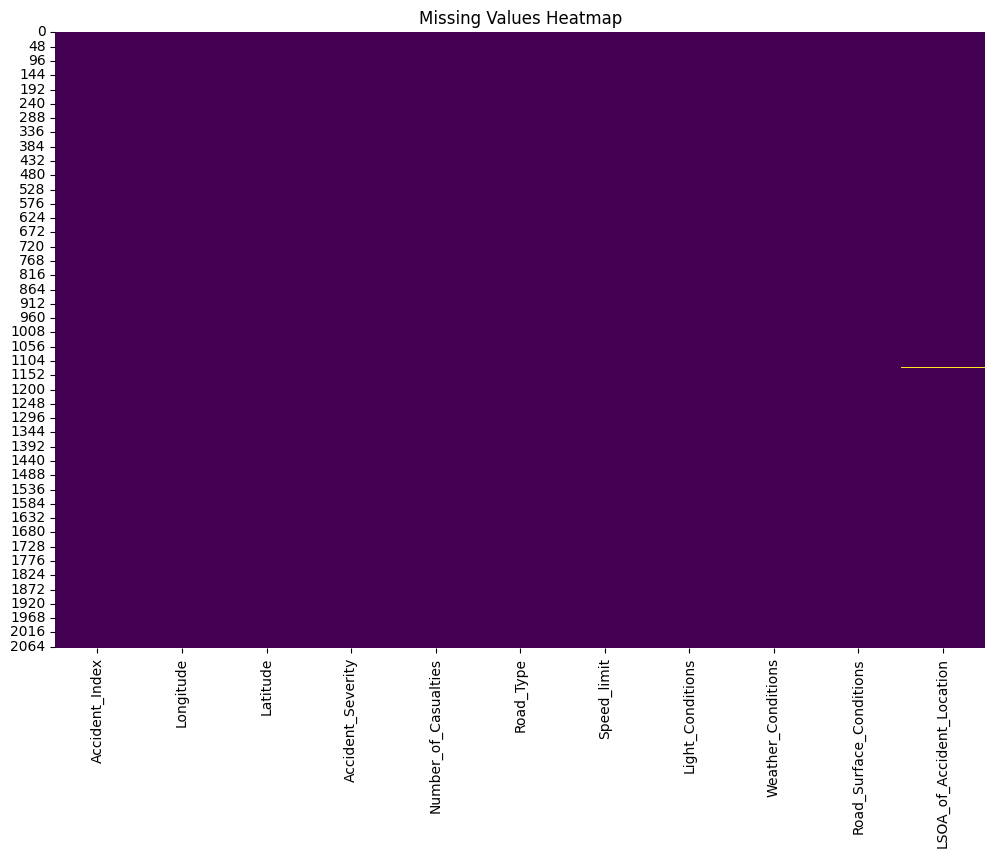

In [22]:
# Create a heatmap to visualize the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(combined_mask, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

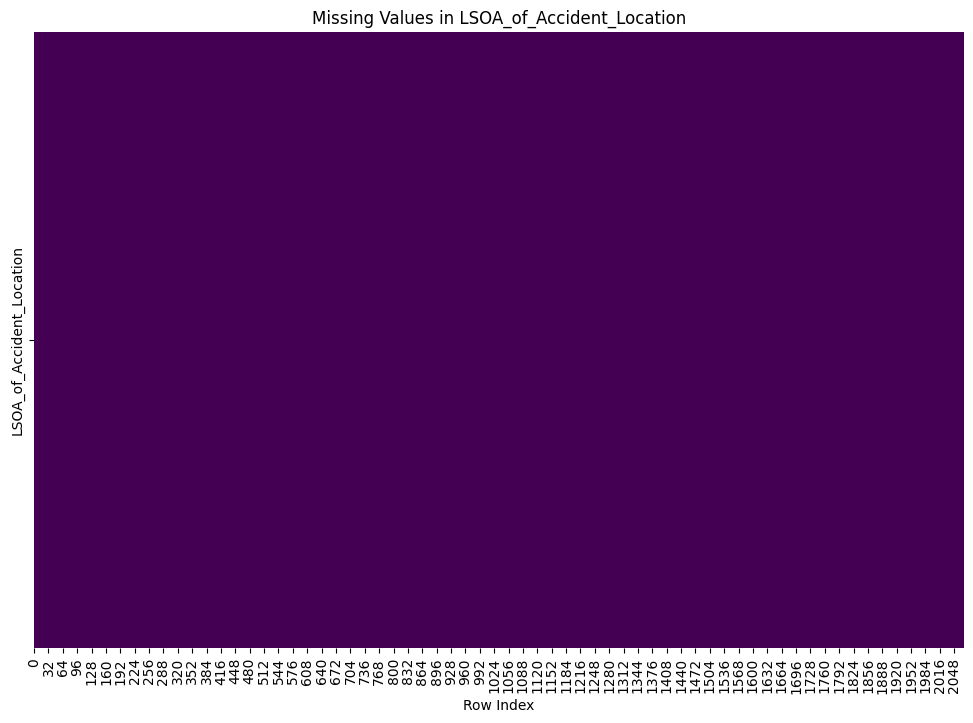

In [23]:
# Create a mask for the missing values in the 'LSOA_of_Accident_Location' column
missing_lsoa_mask = processed_df['LSOA_of_Accident_Location'].isnull()

# Create a heatmap to visualize the missing values in the 'LSOA_of_Accident_Location' column
plt.figure(figsize=(12, 8))
sns.heatmap(missing_lsoa_mask.to_frame().T, cbar=False, cmap='viridis')
plt.title('Missing Values in LSOA_of_Accident_Location')
plt.xlabel('Row Index')
plt.show()

In [7]:
mode_value = processed_df['LSOA_of_Accident_Location'].mode()[0]
processed_df['LSOA_of_Accident_Location'].fillna(mode_value)

0       E01002953
1       E01003002
2       E01002946
3       E01002981
4       E01002955
          ...    
2065    E01002948
2066    E01002968
2067    E01002969
2068    E01002970
2069    E01002953
Name: LSOA_of_Accident_Location, Length: 2070, dtype: object